In [934]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [935]:
df1 = pd.read_csv('/Users/tusharshukla/primetrade_ai_analysis/data/historical_data.csv')
df2 = pd.read_csv('/Users/tusharshukla/primetrade_ai_analysis/data/fear_greed_index.csv')

### - Data Wrangling & Preprocessing

#### Removing some `not so useful` columns:
- Transaction Hash
- Order Id
- Trade ID

In [936]:
print("Before:", df1.shape)
df1.drop(columns=['Transaction Hash', 'Order ID', 'Trade ID'], axis=1, inplace=True)
print("After:", df1.shape)

Before: (211224, 16)
After: (211224, 13)


In [937]:
df1.drop(columns=['Timestamp'], axis=1, inplace=True)

In [938]:
df1['Timestamp IST'] = pd.to_datetime(df1['Timestamp IST'],dayfirst=True,  errors='coerce')

In [939]:
categorical_cols = df1.select_dtypes(include=['object'])
categorical_cols

,Account,Coin,Side,Direction
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,Buy
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,Buy
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,Buy
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,Buy
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,Buy
...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,SELL,Close Long
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,SELL,Close Long
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,SELL,Close Long
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,SELL,Close Long


In [940]:
numerical_cols = df1.select_dtypes(include=['float64'])
numerical_cols

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Fee
0,7.9769,986.87,7872.16,0.000000,0.0000,0.345404
1,7.9800,16.00,127.68,986.524596,0.0000,0.005600
2,7.9855,144.09,1150.63,1002.518996,0.0000,0.050431
3,7.9874,142.98,1142.04,1146.558564,0.0000,0.050043
4,7.9894,8.73,69.75,1289.488521,0.0000,0.003055
...,...,...,...,...,...,...
211219,1.1010,382.20,420.80,7546.600000,-20.2566,0.042080
211220,1.1010,2124.10,2338.63,7164.400000,-112.5773,0.233863
211221,1.1010,423.40,466.16,5040.300000,-22.4402,0.046616
211222,1.1010,3599.80,3963.38,4616.900000,-190.7894,0.396337


In [941]:
df2['timestamp'] = pd.to_datetime(df2['timestamp'])
df2.info()
display(df2.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   datetime64[ns]
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 82.8+ KB


,timestamp,value,classification,date
1451,1970-01-01 00:00:01.643088600,12,Extreme Fear,2022-01-25
1623,1970-01-01 00:00:01.657949400,21,Extreme Fear,2022-07-16
56,1970-01-01 00:00:01.522301400,18,Extreme Fear,2018-03-29
2479,1970-01-01 00:00:01.731994200,90,Extreme Greed,2024-11-19
217,1970-01-01 00:00:01.536471000,13,Extreme Fear,2018-09-09


In [942]:
df1['date'] = df1['Timestamp IST'].dt.date
df1.sample(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Crossed,Fee,date
84156,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,@107,13.64000,996.380,13590.62,SELL,2025-03-11 07:01:00,40412.60911,Sell,-3422.562342,False,1.304699,2025-03-11
50565,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,HYPE,23.81600,200.630,4778.20,BUY,2025-02-22 01:12:00,-16697.96000,Close Short,178.841582,True,1.672371,2025-02-22
77724,0xbaaaf6571ab7d571043ff1e313a9609a10637864,HYPE,12.17000,2.000,24.34,BUY,2025-03-14 01:22:00,164449.78000,Open Long,0.000000,False,0.000000,2025-03-14
204859,0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3,BTC,82980.00000,0.007,580.86,BUY,2025-03-12 17:55:00,5.98432,Open Long,0.000000,False,0.029043,2025-03-12
136595,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,AIXBT,0.51821,317.000,164.27,BUY,2025-01-10 18:48:00,-906.00000,Close Short,13.244260,True,0.057495,2025-01-10


In [943]:
df2['date'] = pd.to_datetime(df2['date'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   datetime64[ns]
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 82.8+ KB


In [944]:
df1['date'] = pd.to_datetime(df1['date'])
df1['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 211224 entries, 0 to 211223
Series name: date
Non-Null Count   Dtype         
--------------   -----         
211224 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.6 MB


In [945]:
df_merged = df1.merge(
    df2[['date', 'value', 'classification']],
    on='date',
    how='left'
)

df_merged.sample(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Crossed,Fee,date,value,classification
83037,0xbaaaf6571ab7d571043ff1e313a9609a10637864,HYPE,11.3320,42.8300,485.35,SELL,2025-04-06 20:45:00,13896.360000,Close Long,1.319164,True,0.145604,2025-04-06,34.0,Fear
122104,0x47add9a56df66b524d5e2c1993a43cde53b6ed85,@107,27.8000,26.9700,749.77,BUY,2024-12-17 13:15:00,3290.057446,Buy,0.000000,False,0.002589,2024-12-17,87.0,Extreme Greed
69164,0xbaaaf6571ab7d571043ff1e313a9609a10637864,HYPE,17.4500,42.9700,749.83,BUY,2025-02-25 15:42:00,303841.530000,Open Long,0.000000,True,0.215949,2025-02-25,25.0,Fear
197321,0x4acb90e786d897ecffb614dc822eb231b4ffb9f4,SUI,2.7622,1830.5000,5056.21,SELL,2025-02-28 20:38:00,21445.200000,Close Long,260.297100,True,1.769672,2025-02-28,16.0,Extreme Fear
27174,0x4f93fead39b70a1824f981a54d4e55b278e9f760,BTC,98455.0000,0.0423,4164.65,SELL,2025-02-14 23:19:00,-1.645060,Open Short,0.000000,True,1.249393,2025-02-14,48.0,Neutral


In [946]:
df1.shape

(211224, 13)

In [947]:
df_merged.shape

(211224, 15)

In [948]:
# Sentiment data missing values
df2.isnull().sum().sum()

np.int64(0)

In [949]:
# Traders data missing values
df1.isnull().sum().sum()

np.int64(0)

In [950]:
df1.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Crossed',
       'Fee', 'date'],
      dtype='object')

In [951]:
df2.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [952]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Account          211224 non-null  object        
 1   Coin             211224 non-null  object        
 2   Execution Price  211224 non-null  float64       
 3   Size Tokens      211224 non-null  float64       
 4   Size USD         211224 non-null  float64       
 5   Side             211224 non-null  object        
 6   Timestamp IST    211224 non-null  datetime64[ns]
 7   Start Position   211224 non-null  float64       
 8   Direction        211224 non-null  object        
 9   Closed PnL       211224 non-null  float64       
 10  Crossed          211224 non-null  bool          
 11  Fee              211224 non-null  float64       
 12  date             211224 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](2), float64(6), object(4)
memory usage: 19.5+ M

In [953]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   datetime64[ns]
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 82.8+ KB


In [954]:
df_merged_missing_values = df_merged.isnull().sum()
df_merged_missing_values[df_merged_missing_values > 0]

value             6
classification    6
dtype: int64

In [955]:
# drop 6 missing values 
df_merged = df_merged.dropna(subset=['value', 'classification'])
df_merged.isnull().sum().sum()

np.int64(0)

### - Feature Engineering

In [956]:
# ============================================================
# 1. PERFORMANCE METRICS
# ============================================================

# Profit/Loss Flag
# for calculation
df_merged['is_profitable'] = df_merged['Closed PnL'] > 0
# for analysis & visulaization 
df_merged['trade_result'] = df_merged['Closed PnL'].apply(
    lambda x: 'Profit' if x > 0 else ('Loss' if x < 0 else 'Breakeven')
)

# ROI - Return on investment (%)
df_merged['roi'] = (df_merged['Closed PnL'] / df_merged['Size USD']) * 100

# Net profit afte fees
df_merged['net_pnl'] = df_merged['Closed PnL'] - df_merged['Fee']


# ============================================================
# 2. TRADE CHARACTERSTICS
# ============================================================

# Position type (Long/Short)
def classify_direction(x):
    x = str(x)

    if 'Short' in x and 'Long' in x:
        return 'Other'
    elif 'Short' in x:
        return 'Short'
    elif 'Long' in x:
        return 'Long'
    else:
        return 'Other'

df_merged['position_type'] = df_merged['Direction'].apply(classify_direction)


# Trade action (Open/Close)
def classify_trade_action(x):
    x = str(x)

    if 'Open' in x and 'Close' in x:
        return 'Other'
    elif 'Open' in x:
        return 'Open'
    elif 'Close' in x:
        return 'Close'
    else:
        return 'Other'

df_merged['trade_action'] = df_merged['Direction'].apply(classify_trade_action)


# Trade size category
df_merged['szie_category'] = pd.cut(
    df_merged['Size USD'],
    bins=[0, 100, 450, 650, 2000, float('inf')],
    labels=['Micro', 'Small', 'Medium', 'Large', 'Xlarge'],
    include_lowest=True
)

# ============================================================
# 3. SENTIMENT FEATURES
# ============================================================

# Sentiment extremes
df_merged['sentiment_category'] = pd.cut(
    df_merged['value'],
    bins=[-float('inf'), 30, 45, 55, 70, float('inf')],
    labels=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'],
    right=False
)


# ============================================================
# 4. TIME BASED FEATURES
# ============================================================

df_merged['hour'] = df_merged['Timestamp IST'].dt.hour
df_merged['day_of_week'] = df_merged['Timestamp IST'].dt.day_name()
df_merged['month_name'] = df_merged['Timestamp IST'].dt.month_name()
df_merged['month'] = df_merged['Timestamp IST'].dt.month


# ============================================================
# 5. TRADER LEVEL FEATURES
# ============================================================

# Total trades per trader 
trader_trade_counts = df_merged.groupby('Account').size()
df_merged['trader_total_trades'] = df_merged['Account'].map(trader_trade_counts)

# Total PnL per trader
trader_total_pnl = df_merged.groupby('Account')['Closed PnL'].sum()
df_merged['trader_total_pnl'] = df_merged['Account'].map(trader_total_pnl)

# Trader win rate
trader_win_rate = df_merged.groupby('Account')['is_profitable'].mean()
df_merged['trader_win_rate'] = df_merged['Account'].map(trader_win_rate)

# Active traders
df_merged['is_active_trader'] = df_merged['trader_total_trades'] >= 10

In [957]:
missing_values = df_merged.isna().sum()
missing_values[missing_values > 0]

roi    43
dtype: int64

In [958]:
df_merged = df_merged.dropna(subset=['roi'])
missing_values[missing_values > 0]

roi    43
dtype: int64

In [959]:
df_merged['is_active_trader'] = df_merged['trader_total_trades'] >= 10

In [960]:
df_merged['is_active_trader'].value_counts()

is_active_trader
True    211175
Name: count, dtype: int64

### Basic Exploration

In [961]:
# ============================================================
# DATASET OVERVIEW
# ============================================================

print("="*60)
print("DATASET OVERVIEW", )
print("="*60)

print(f"\nTotal Trades: {len(df_merged):,}")
print(f"Unique Traders: {df_merged['Account'].nunique()}")
print(f"Unique Coins: {df_merged['Coin'].nunique()}")
print(f"Date Rane: '{(df_merged['date'].min()).date()}' to '{(df_merged['date'].max()).date()}'")
print(f"Days Covered: {(df_merged['date'].max() - df_merged['date'].min()).days}")


# ============================================================
# SENTIMENT DISTRIBUTION
# ============================================================

print("\n"+"\n"+"="*60)
print("SENTIMENT DISTRIBUTION", )
print("="*60)
print("\nFear Vs Greed:")
print("-"*23)
print(f"{df_merged['classification'].value_counts()}")
print("\nDetailed Sentiment:")
print("-"*23)
print(df_merged['sentiment_category'].value_counts())


# ============================================================
# PERFORMANCE OVERVIEW
# ============================================================

print("\n"+"\n"+"="*60)
print("OVERALL PERFORMANCE", )
print("="*60)

print(f"\nTotal PnL: ${df_merged['Closed PnL'].sum():,.2f}")
print(f"Average PnL: ${df_merged['Closed PnL'].mean():,.2f}")
print(f"Median PnL per trade: ${df_merged['Closed PnL'].median():,.2f}")
print(f"Win Rate: {df_merged['is_profitable'].mean()*100:,.2f}%")
print(f"Average ROI: {df_merged['roi'].mean()*100:,.2f}%")


# ============================================================
# TRADE CHARACTERSTICS
# ============================================================


print("\n"+"\n"+"="*60)
print("TRADE CHARACTERSTICS:")
print("="*60)

print("\nPosition Types:")
print(df_merged['position_type'].value_counts())


print("\Trade Actions:")
print(df_merged['trade_action'].value_counts())


print("\nSide Distribution:")
print(df_merged['Side'].value_counts())

print("\nTop 5 Traded Coins:")
print(df_merged['Coin'].value_counts().head())

DATASET OVERVIEW

Total Trades: 211,175
Unique Traders: 32
Unique Coins: 245
Date Rane: '2023-05-01' to '2025-05-01'
Days Covered: 731


SENTIMENT DISTRIBUTION

Fear Vs Greed:
-----------------------
classification
Fear             61826
Greed            50283
Extreme Greed    39980
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64

Detailed Sentiment:
-----------------------
sentiment_category
Extreme Greed    70551
Fear             41848
Extreme Fear     41378
Neutral          37686
Greed            19712
Name: count, dtype: int64


OVERALL PERFORMANCE

Total PnL: $10,254,486.95
Average PnL: $48.56
Median PnL per trade: $0.00
Win Rate: 41.13%
Average ROI: 189.81%


TRADE CHARACTERSTICS:

Position Types:
position_type
Long     98573
Short    75749
Other    36853
Name: count, dtype: int64
\Trade Actions:
trade_action
Open     89636
Close    84685
Other    36854
Name: count, dtype: int64

Side Distribution:
Side
SELL    108485
BUY     102690
Name: count, dtype: int

<>:59: SyntaxWarning: invalid escape sequence '\T'
<>:59: SyntaxWarning: invalid escape sequence '\T'
/var/folders/2n/vnp09xnn0s35m3xr_5c7_b300000gn/T/ipykernel_63031/3822117210.py:59: SyntaxWarning: invalid escape sequence '\T'
  print("\Trade Actions:")


### Core Analysis - Sentiment vs Performance

In [962]:
# ============================================================
# KEY ANALYSIS 1: Fear Vs Greed Performance
# ============================================================

print("\n"+"="*102)
print("KEY ANALYSIS 1: Fear Vs Greed Performance:")
print("="*102)

sentiment_performance = df_merged.groupby('classification').agg({
    'Closed PnL' : ['mean', 'median', 'sum', 'std'],
    'is_profitable': 'mean',
    'roi': 'mean',
    'Size USD': 'mean',
    'Account': 'count'
}).round(2)


sentiment_performance.columns = [
    'Avg_PnL', 'Median_PnL', 'Total_PnL', 'PnL_StdDev', 
    'Win_Rate', 'Avg_ROI', 'Avg_Trade_Size', 'Trade_Count']

display(sentiment_performance)



# ============================================================
# KEY ANALYSIS 2: Detailed Sentiment Categories
# ============================================================

print("\n"+"\n"+"="*102)
print("KEY ANALYSIS 2: Detailed Sentiment Categories:")
print("="*102)

detailed_sentiment = df_merged.groupby('sentiment_category').agg({
    'Closed PnL': 'mean',
    'is_profitable': 'mean',
    'roi': 'mean',
    'Account': 'count'
}).round(2)

detailed_sentiment.columns = ['Avg_PnL', 'Win_Rate', 'Avg_ROI', 'Trade_Count']
display(detailed_sentiment)


# ============================================
# KEY ANALYSIS 3: Position Type vs Sentiment
# ============================================

print("\n" + "="*60)
print("ANALYSIS 3: LONG vs SHORT PERFORMANCE BY SENTIMENT")
print("="*60)

position_sentiment = df_merged.groupby(['classification', 'position_type']).agg({
    'Closed PnL': 'mean',
    'is_profitable': 'mean',
    'Account': 'count'
}).round(2)

position_sentiment.columns = ['Avg_PnL', 'Win_Rate', 'Trade_Count']
display(position_sentiment)


# ============================================
# KEY ANALYSIS 4: Coin Performance by Sentiment
# ============================================

print("\n" + "="*60)
print("ANALYSIS 4: TOP COINS PERFORMANCE BY SENTIMENT")
print("="*60)

# Get top 5 most traded coins
top_coins = df_merged['Coin'].value_counts().head(5).index

coin_sentiment = df_merged[df_merged['Coin'].isin(top_coins)].groupby(['Coin', 'classification']).agg({
    'Closed PnL': 'mean',
    'is_profitable': 'mean',
    'Account': 'count'
}).round(2)

coin_sentiment.columns = ['Avg_PnL', 'Win_Rate', 'Trade_Count']
display(coin_sentiment)


KEY ANALYSIS 1: Fear Vs Greed Performance:


,Avg_PnL,Median_PnL,Total_PnL,PnL_StdDev,Win_Rate,Avg_ROI,Avg_Trade_Size,Trade_Count
classification,,,,,,,,
Extreme Fear,34.54,0.0,739110.25,1136.06,0.37,0.43,5349.73,21400
Extreme Greed,67.91,0.0,2715171.31,766.94,0.47,4.00,3113.19,39980
Fear,54.30,0.0,3357155.44,935.44,0.42,1.54,7817.50,61826
Greed,42.76,0.0,2150129.27,1116.25,0.38,1.97,5739.17,50283
Neutral,34.31,0.0,1292920.68,517.12,0.40,0.99,4782.73,37686




KEY ANALYSIS 2: Detailed Sentiment Categories:


/var/folders/2n/vnp09xnn0s35m3xr_5c7_b300000gn/T/ipykernel_63031/3954985442.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  detailed_sentiment = df_merged.groupby('sentiment_category').agg({


,Avg_PnL,Win_Rate,Avg_ROI,Trade_Count
sentiment_category,,,,
Extreme Fear,31.88,0.38,0.73,41378
Fear,66.36,0.43,1.78,41848
Neutral,34.31,0.40,0.99,37686
Greed,36.15,0.37,0.87,19712
Extreme Greed,58.86,0.43,3.43,70551



ANALYSIS 3: LONG vs SHORT PERFORMANCE BY SENTIMENT


Avg_PnL  Win_Rate  Trade_Count
classification position_type                                
Extreme Fear   Long             38.26      0.40        13246
               Other           -81.74      0.24         1863
               Short            61.14      0.35         6291
Extreme Greed  Long             32.95      0.47        13486
               Other           168.85      0.54        12334
               Short            13.29      0.39        14160
Fear           Long             40.83      0.44        35084
               Other             1.45      0.39         6634
               Short            95.24      0.40        20108
Greed          Long             43.01      0.42        16542
               Other            76.85      0.43        10754
               Short            26.63      0.34        22987
Neutral        Long             26.11      0.43        20215
               Other            39.97      0.34         5268
               Short            45.44      0.37        12203


ANALYSIS 4: TOP COINS PERFORMANCE BY SENTIMENT


Avg_PnL  Win_Rate  Trade_Count
Coin classification                                
@107 Extreme Fear     -89.59      0.25         1519
     Extreme Greed    191.16      0.56        10403
     Fear              -2.29      0.41         5462
     Greed             86.25      0.46         8398
     Neutral           52.15      0.40         4210
BTC  Extreme Fear       1.73      0.31         1765
     Extreme Greed     41.41      0.34         2436
     Fear              48.90      0.39         9870
     Greed             15.95      0.33         7240
     Neutral           34.92      0.33         4753
ETH  Extreme Fear     196.93      0.56         1393
     Extreme Greed    -20.76      0.26         2024
     Fear             236.86      0.42         2850
     Greed             98.22      0.26         3574
     Neutral           46.75      0.46         1317
HYPE Extreme Fear      46.90      0.40        10278
     Extreme Greed     28.10      0.41         5683
     Fear              30.06      0.43        27951
     Greed             24.57      0.37         6769
     Neutral           17.32      0.41        17324
SOL  Extreme Fear      56.01      0.31         1878
     Extreme Greed     19.72      0.26         1913
     Fear             189.47      0.50         3914
     Greed            284.80      0.29         1586
     Neutral          216.70      0.52         1400

In [963]:
# ============================================================
# KEY ANALYSIS 5: TRADER SEGMENTATION
# ============================================================

print("\n" + "="*80)
print("ANALYSIS 5: TOP vs BOTTOM TRADERS - BEHAVIORAL DIFFERENCES")
print("="*80)

# Segment traders by performance
trader_performance = df_merged.groupby('Account')['Closed PnL'].sum().sort_values(ascending=False)

# Get top 10% and bottom 10%
top_10_pct = int(len(trader_performance) * 0.1)
top_traders = trader_performance.head(top_10_pct).index
bottom_traders = trader_performance.tail(top_10_pct).index

# Add trader category
df_merged['trader_category'] = 'Average'
df_merged.loc[df_merged['Account'].isin(top_traders), 'trader_category'] = 'Top 10%'
df_merged.loc[df_merged['Account'].isin(bottom_traders), 'trader_category'] = 'Bottom 10%'

# Compare behaviors
trader_comparison = df_merged.groupby(['trader_category', 'classification']).agg({
    'Closed PnL': 'mean',
    'is_profitable': 'mean',
    'roi': 'mean',
    'Size USD': 'mean',
    'Account': 'count'
}).round(2)

trader_comparison.columns = ['Avg_PnL', 'Win_Rate', 'Avg_ROI', 'Avg_Trade_Size', 'Trade_Count']
display(trader_comparison)

print("\n--- KEY INSIGHT ---")
# Calculate sentiment preference for top traders
top_trader_sentiment_dist = df_merged[df_merged['trader_category'] == 'Top 10%']['classification'].value_counts(normalize=True) * 100
print("\nTop Traders' Sentiment Distribution:")
print(top_trader_sentiment_dist.round(1))

bottom_trader_sentiment_dist = df_merged[df_merged['trader_category'] == 'Bottom 10%']['classification'].value_counts(normalize=True) * 100
print("\nBottom Traders' Sentiment Distribution:")
print(bottom_trader_sentiment_dist.round(1))


# ============================================================
# KEY ANALYSIS 6: CONTRARIAN vs MOMENTUM TRADERS
# ============================================================

print("\n" + "="*80)
print("ANALYSIS 6: IDENTIFYING CONTRARIAN TRADERS")
print("="*80)

# Calculate each trader's performance in Fear vs Greed
trader_sentiment_perf = df_merged.groupby(['Account', 'classification'])['Closed PnL'].sum().unstack(fill_value=0)

# Contrarians: profit more in Fear
# Momentum: profit more in Greed
trader_sentiment_perf['strategy_type'] = 'Neutral'
trader_sentiment_perf.loc[trader_sentiment_perf['Fear'] > trader_sentiment_perf['Greed'] * 1.5, 'strategy_type'] = 'Contrarian'
trader_sentiment_perf.loc[trader_sentiment_perf['Greed'] > trader_sentiment_perf['Fear'] * 1.5, 'strategy_type'] = 'Momentum'

strategy_distribution = trader_sentiment_perf['strategy_type'].value_counts()
print("\nTrader Strategy Distribution:")
print(strategy_distribution)

# Map back to main dataframe
strategy_map = trader_sentiment_perf['strategy_type'].to_dict()
df_merged['trader_strategy'] = df_merged['Account'].map(strategy_map)

# Compare strategies
strategy_performance = df_merged.groupby('trader_strategy').agg({
    'Closed PnL': ['mean', 'sum'],
    'is_profitable': 'mean',
    'Account': 'nunique'
}).round(2)
strategy_performance.columns = ['Avg_PnL', 'Total_PnL', 'Win_Rate', 'Num_Traders']
print("\nStrategy Performance Comparison:")
display(strategy_performance)


# ============================================================
# KEY ANALYSIS 7: TRADE TIMING PATTERNS
# ============================================================

print("\n" + "="*80)
print("ANALYSIS 7: OPTIMAL TRADING TIMES")
print("="*80)

# Performance by hour
hourly_performance = df_merged.groupby('hour').agg({
    'Closed PnL': 'mean',
    'is_profitable': 'mean',
    'Account': 'count'
}).round(2)
hourly_performance.columns = ['Avg_PnL', 'Win_Rate', 'Trade_Count']

print("\nTop 5 Most Profitable Hours:")
display(hourly_performance.nlargest(5, 'Avg_PnL'))

# Performance by day of week
daily_performance = df_merged.groupby('day_of_week').agg({
    'Closed PnL': 'mean',
    'is_profitable': 'mean',
    'Account': 'count'
}).round(2)
daily_performance.columns = ['Avg_PnL', 'Win_Rate', 'Trade_Count']

print("\nPerformance by Day of Week:")
display(daily_performance)


# ============================================================
# KEY ANALYSIS 8: SIZE vs SENTIMENT
# ============================================================

print("\n" + "="*80)
print("ANALYSIS 8: POSITION SIZING BEHAVIOR")
print("="*80)

size_sentiment = df_merged.groupby(['classification', 'szie_category']).agg({
    'Closed PnL': 'mean',
    'is_profitable': 'mean',
    'Account': 'count'
}).round(2)

size_sentiment.columns = ['Avg_PnL', 'Win_Rate', 'Trade_Count']
print("\nPosition Size Performance by Sentiment:")
display(size_sentiment)

# Do traders increase size during Greed?
avg_size_by_sentiment = df_merged.groupby('classification')['Size USD'].mean()
print("\nAverage Trade Size by Sentiment:")
print(avg_size_by_sentiment.round(2))


ANALYSIS 5: TOP vs BOTTOM TRADERS - BEHAVIORAL DIFFERENCES


Avg_PnL  Win_Rate  Avg_ROI  Avg_Trade_Size  \
trader_category classification                                               
Average         Extreme Fear      24.92      0.38     0.23         5765.19   
                Extreme Greed     44.07      0.47     3.91         2883.09   
                Fear              33.10      0.40     1.03         9559.84   
                Greed             43.42      0.40     1.79         5540.65   
                Neutral           24.37      0.40     0.75         5259.16   
Bottom 10%      Extreme Fear     -22.60      0.31     0.06         5028.00   
                Extreme Greed     53.74      0.33  -137.81         3210.58   
                Fear              46.89      0.36     4.53         4664.52   
                Greed           -202.12      0.48    -0.49         5907.25   
                Neutral           17.33      0.20     0.46         4392.16   
Top 10%         Extreme Fear      74.49      0.37     1.08         4262.62   
                Extreme Greed    411.52      0.35    19.27         6405.48   
                Fear             106.12      0.47     2.08         4401.25   
                Greed            125.37      0.26     3.97         6954.13   
                Neutral           71.71      0.44     1.92         3223.51   

                                Trade_Count  
trader_category classification               
Average         Extreme Fear          14862  
                Extreme Greed         37138  
                Fear                  40747  
                Greed                 41522  
                Neutral               27960  
Bottom 10%      Extreme Fear           1219  
                Extreme Greed           254  
                Fear                   3859  
                Greed                  2294  
                Neutral                1578  
Top 10%         Extreme Fear           5319  
                Extreme Greed          2588  
                Fear                  17220  
                Greed                  6467  
                Neutral                8148


--- KEY INSIGHT ---

Top Traders' Sentiment Distribution:
classification
Fear             43.3
Neutral          20.5
Greed            16.3
Extreme Fear     13.4
Extreme Greed     6.5
Name: proportion, dtype: float64

Bottom Traders' Sentiment Distribution:
classification
Fear             41.9
Greed            24.9
Neutral          17.1
Extreme Fear     13.2
Extreme Greed     2.8
Name: proportion, dtype: float64

ANALYSIS 6: IDENTIFYING CONTRARIAN TRADERS

Trader Strategy Distribution:
strategy_type
Momentum      17
Contrarian    14
Neutral        1
Name: count, dtype: int64

Strategy Performance Comparison:


,Avg_PnL,Total_PnL,Win_Rate,Num_Traders
trader_strategy,,,,
Contrarian,58.99,4672487.74,0.38,14
Momentum,42.00,5528502.96,0.43,17
Neutral,161.13,53496.25,0.48,1



ANALYSIS 7: OPTIMAL TRADING TIMES

Top 5 Most Profitable Hours:


,Avg_PnL,Win_Rate,Trade_Count
hour,,,
12,131.17,0.44,6950
7,83.03,0.40,8585
11,76.86,0.49,6150
10,61.35,0.35,6745
8,58.89,0.42,7848



Performance by Day of Week:


,Avg_PnL,Win_Rate,Trade_Count
day_of_week,,,
Friday,50.27,0.48,29622
Monday,51.10,0.41,34415
Saturday,63.32,0.38,20414
Sunday,52.92,0.35,20109
Thursday,46.28,0.46,30439
Tuesday,47.49,0.35,36457
Wednesday,38.02,0.43,39719



ANALYSIS 8: POSITION SIZING BEHAVIOR

Position Size Performance by Sentiment:


/var/folders/2n/vnp09xnn0s35m3xr_5c7_b300000gn/T/ipykernel_63031/1495836167.py:120: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_sentiment = df_merged.groupby(['classification', 'szie_category']).agg({


Avg_PnL  Win_Rate  Trade_Count
classification szie_category                                
Extreme Fear   Micro            -0.48      0.35         2849
               Small             0.95      0.31         3572
               Medium            3.46      0.37         3641
               Large             4.40      0.39         4996
               Xlarge          110.77      0.40         6342
Extreme Greed  Micro             2.70      0.54         9552
               Small            13.77      0.49         9169
               Medium           18.81      0.42         3998
               Large            41.57      0.45         7976
               Xlarge          232.25      0.41         9285
Fear           Micro             0.71      0.41         9246
               Small             3.66      0.40        11947
               Medium            8.08      0.45         8457
               Large            17.58      0.42        14495
               Xlarge          168.75      0.43        17681
Greed          Micro             1.27      0.43         9027
               Small             6.33      0.37        11128
               Medium            4.59      0.30         6553
               Large            22.55      0.41        10265
               Xlarge          135.74      0.39        13310
Neutral        Micro             0.33      0.40         7150
               Small             2.17      0.38         8249
               Medium            5.70      0.38         4951
               Large            13.96      0.39         8110
               Xlarge          122.62      0.43         9226


Average Trade Size by Sentiment:
classification
Extreme Fear     5349.73
Extreme Greed    3113.19
Fear             7817.50
Greed            5739.17
Neutral          4782.73
Name: Size USD, dtype: float64


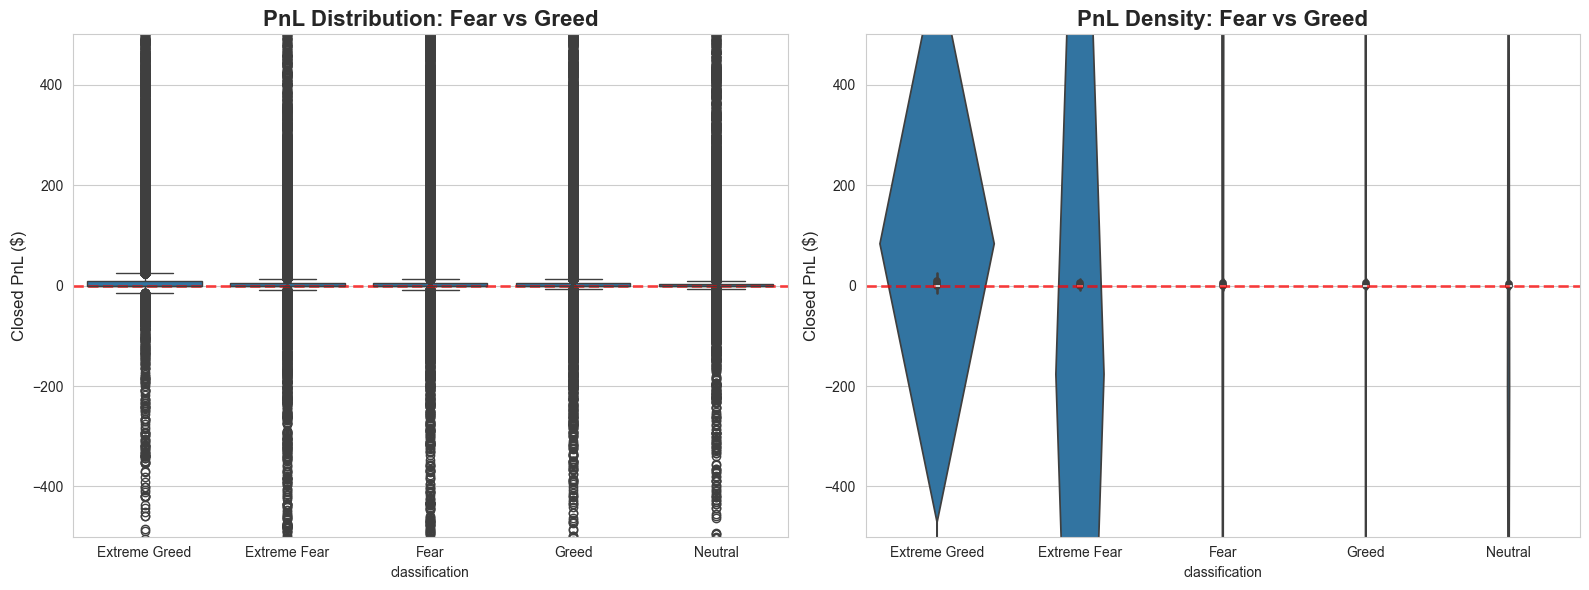

/var/folders/2n/vnp09xnn0s35m3xr_5c7_b300000gn/T/ipykernel_63031/650356340.py:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  detailed_winrate = df_merged.groupby('sentiment_category')['is_profitable'].mean() * 100


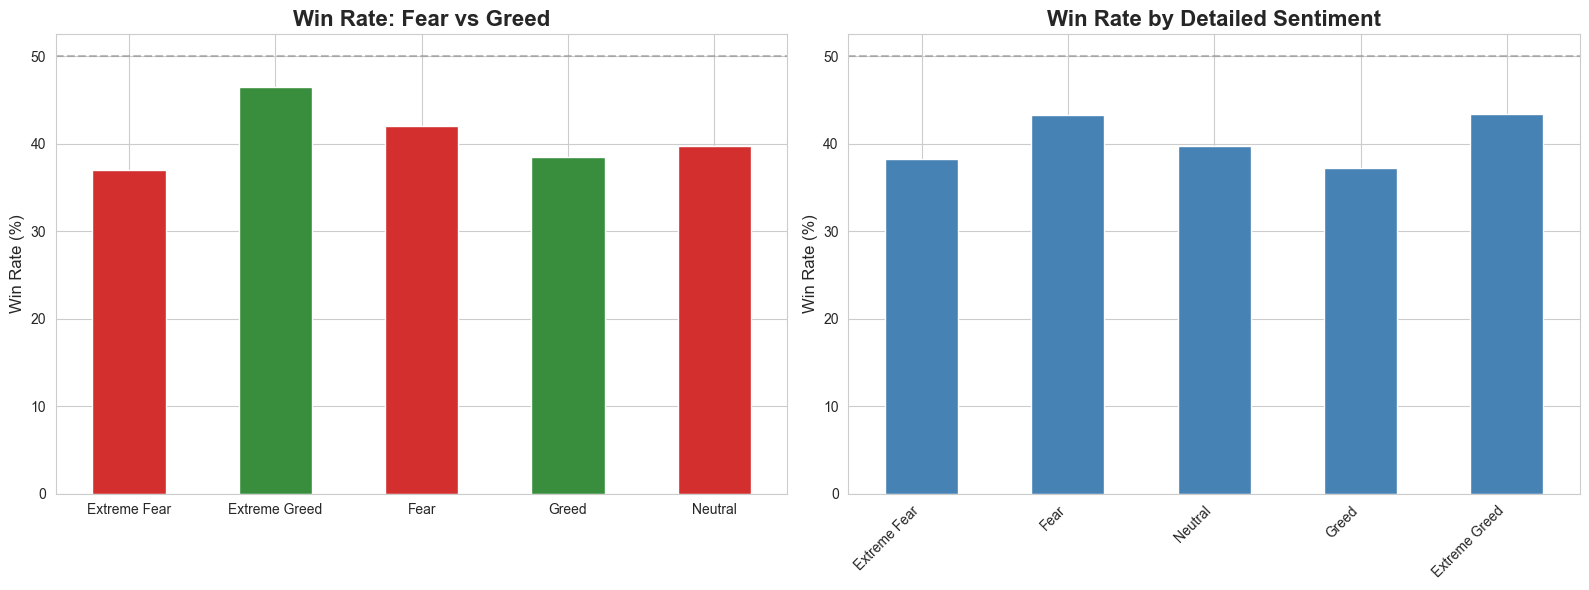

/var/folders/2n/vnp09xnn0s35m3xr_5c7_b300000gn/T/ipykernel_63031/650356340.py:67: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_coin = df_merged[df_merged['Coin'].isin(top_coins)].groupby(['Coin', 'sentiment_category'])['Closed PnL'].mean().unstack()


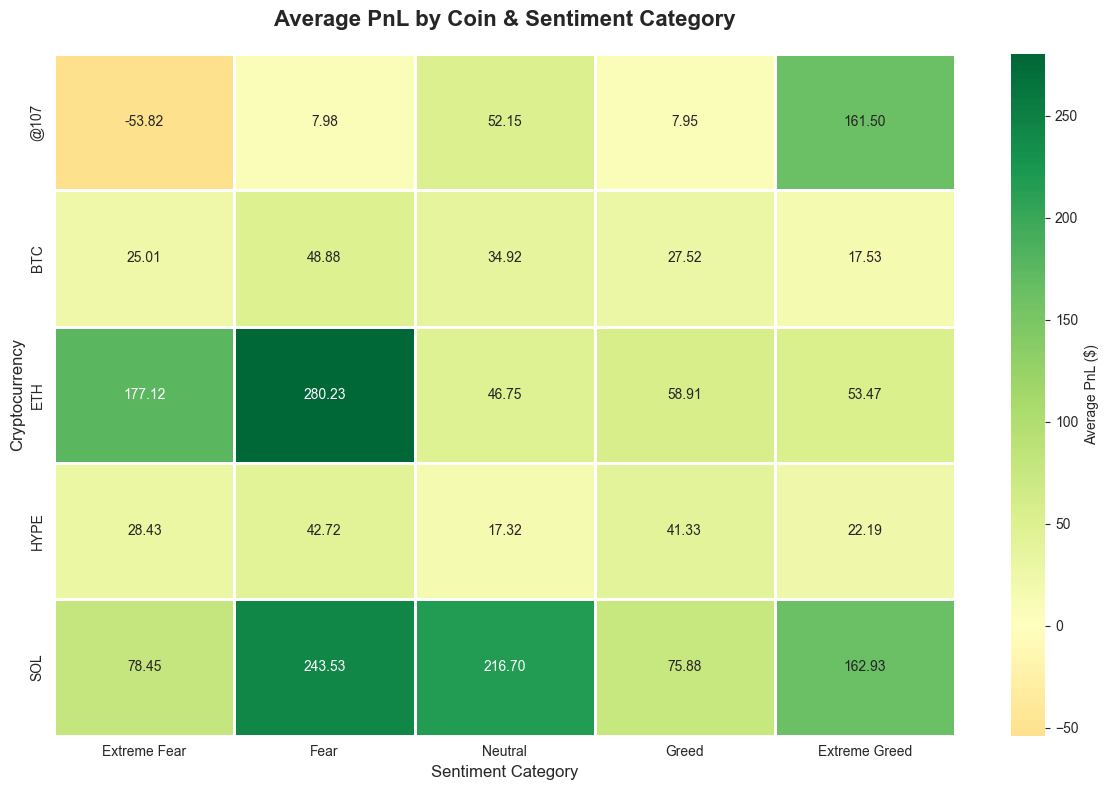

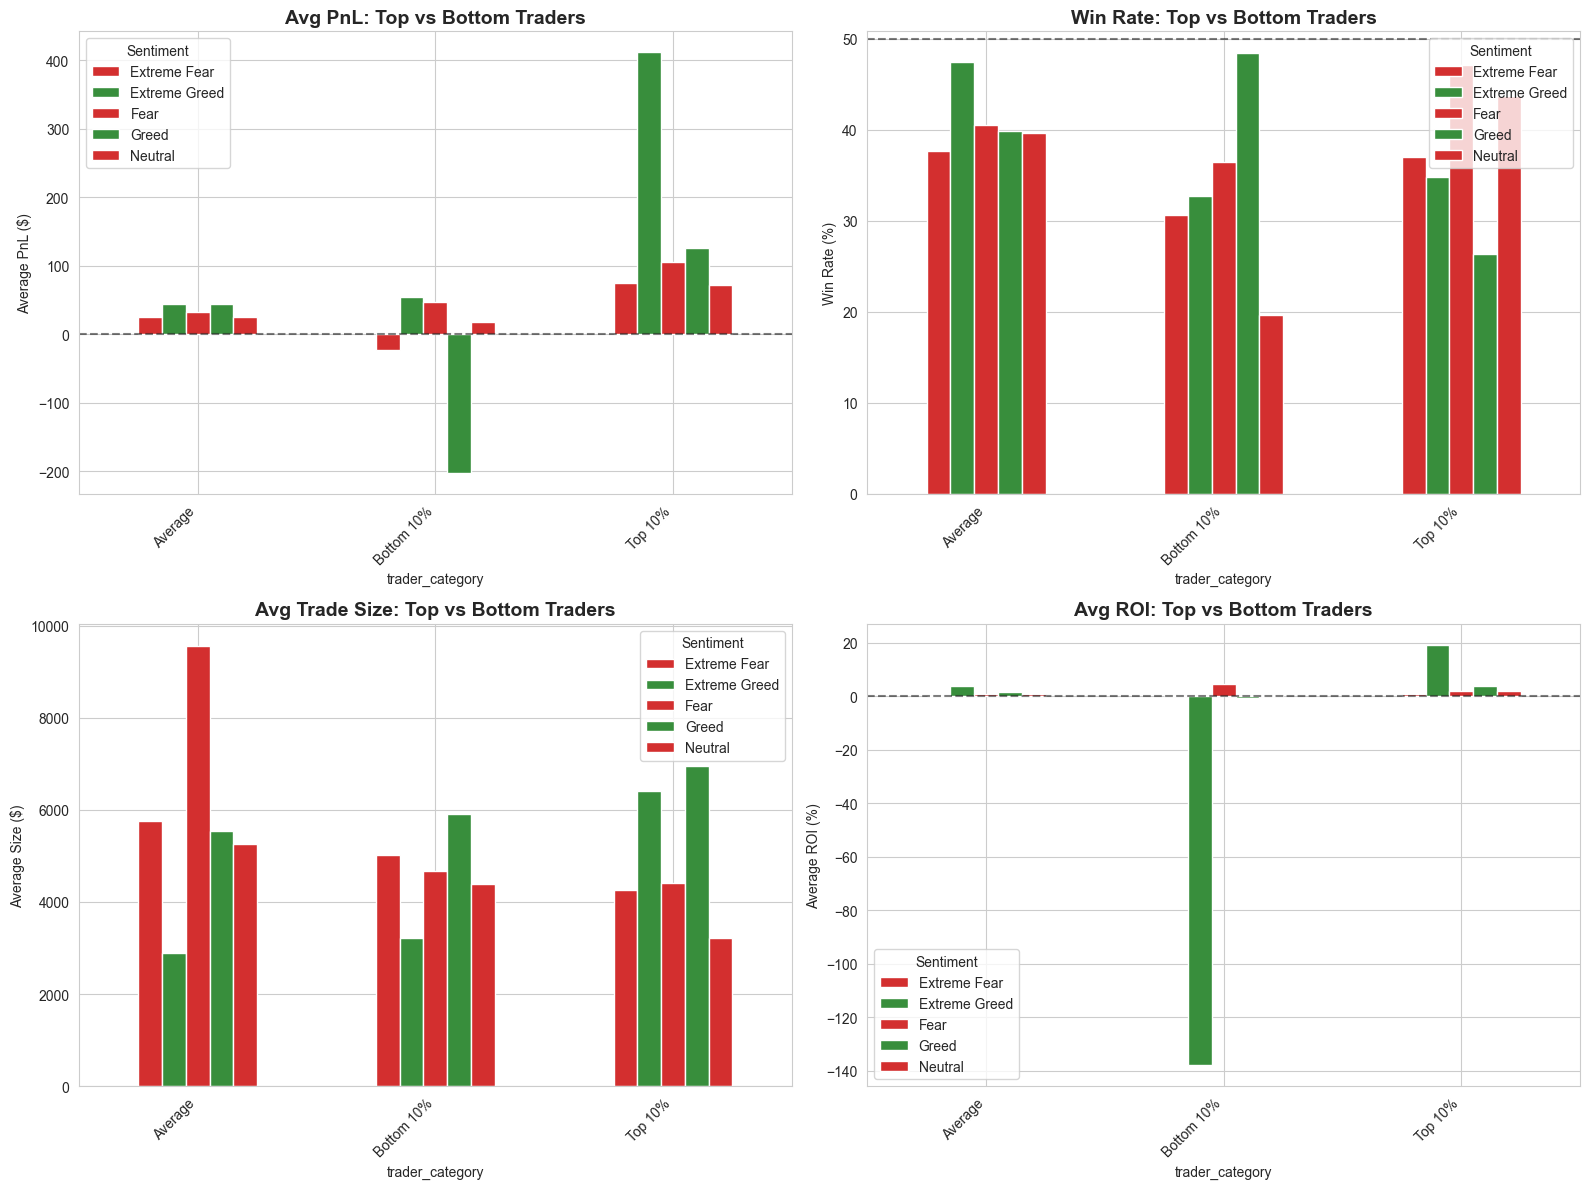

<Figure size 1600x600 with 0 Axes>

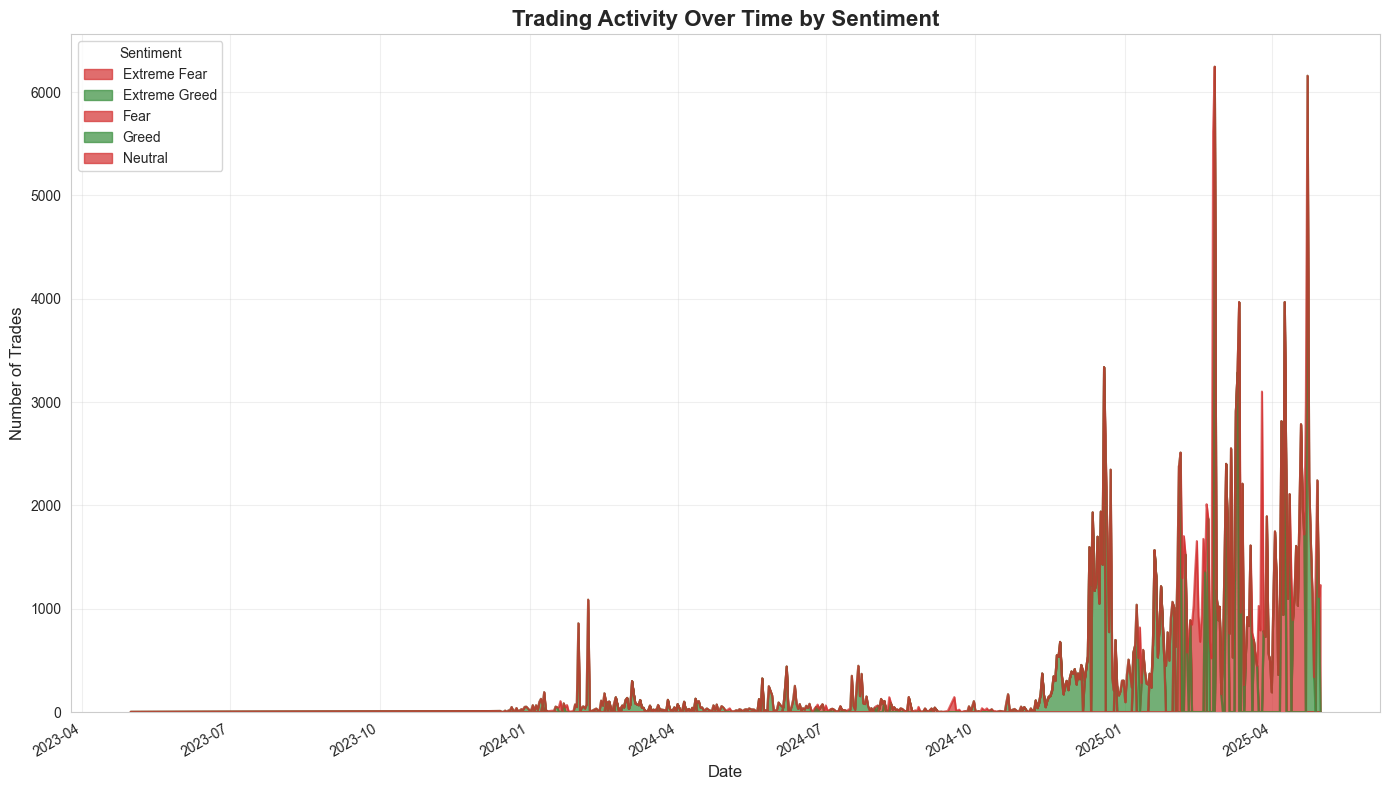

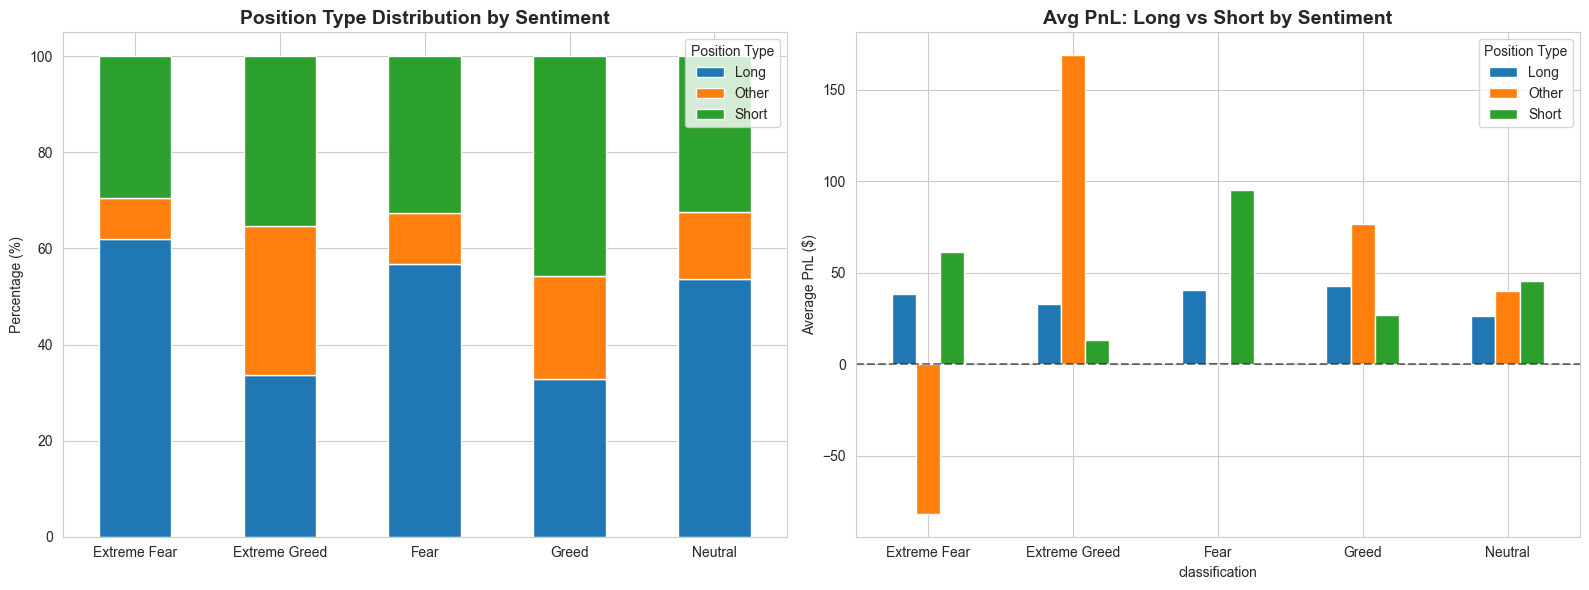

In [964]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

# ============================================================
# VISUALIZATION 1: PnL Distribution - Fear vs Greed
# ============================================================

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot
sns.boxplot(data=df_merged, x='classification', y='Closed PnL', ax=axes[0])
axes[0].set_title('PnL Distribution: Fear vs Greed', fontsize=16, fontweight='bold')
axes[0].axhline(y=0, color='red', linestyle='--', alpha=0.7, linewidth=2)
axes[0].set_ylim(-500, 500)
axes[0].set_ylabel('Closed PnL ($)', fontsize=12)

# Violin plot
sns.violinplot(data=df_merged, x='classification', y='Closed PnL', ax=axes[1])
axes[1].set_title('PnL Density: Fear vs Greed', fontsize=16, fontweight='bold')
axes[1].axhline(y=0, color='red', linestyle='--', alpha=0.7, linewidth=2)
axes[1].set_ylim(-500, 500)
axes[1].set_ylabel('Closed PnL ($)', fontsize=12)

plt.tight_layout()
plt.savefig('pnl_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


# ============================================================
# VISUALIZATION 2: Win Rate Comparison
# ============================================================

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Fear vs Greed
sentiment_winrate = df_merged.groupby('classification')['is_profitable'].mean() * 100
sentiment_winrate.plot(kind='bar', ax=axes[0], color=['#d32f2f', '#388e3c'])
axes[0].set_title('Win Rate: Fear vs Greed', fontsize=16, fontweight='bold')
axes[0].set_ylabel('Win Rate (%)', fontsize=12)
axes[0].set_xlabel('')
axes[0].axhline(y=50, color='gray', linestyle='--', alpha=0.5)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Detailed categories
detailed_winrate = df_merged.groupby('sentiment_category')['is_profitable'].mean() * 100
detailed_winrate.plot(kind='bar', ax=axes[1], color='steelblue')
axes[1].set_title('Win Rate by Detailed Sentiment', fontsize=16, fontweight='bold')
axes[1].set_ylabel('Win Rate (%)', fontsize=12)
axes[1].set_xlabel('')
axes[1].axhline(y=50, color='gray', linestyle='--', alpha=0.5)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('winrate_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


# ============================================================
# VISUALIZATION 3: Heatmap - Coin Performance
# ============================================================

plt.figure(figsize=(12, 8))
pivot_coin = df_merged[df_merged['Coin'].isin(top_coins)].groupby(['Coin', 'sentiment_category'])['Closed PnL'].mean().unstack()
sns.heatmap(pivot_coin, annot=True, fmt='.2f', cmap='RdYlGn', center=0, 
            cbar_kws={'label': 'Average PnL ($)'}, linewidths=1)
plt.title('Average PnL by Coin & Sentiment Category', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Sentiment Category', fontsize=12)
plt.ylabel('Cryptocurrency', fontsize=12)
plt.tight_layout()
plt.savefig('coin_sentiment_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


# ============================================================
# VISUALIZATION 4: Top vs Bottom Traders
# ============================================================

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 4a: Average PnL
trader_pnl = df_merged.groupby(['trader_category', 'classification'])['Closed PnL'].mean().unstack()
trader_pnl.plot(kind='bar', ax=axes[0, 0], color=['#d32f2f', '#388e3c'])
axes[0, 0].set_title('Avg PnL: Top vs Bottom Traders', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Average PnL ($)')
axes[0, 0].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[0, 0].legend(title='Sentiment')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')

# 4b: Win Rate
trader_winrate = df_merged.groupby(['trader_category', 'classification'])['is_profitable'].mean() * 100
trader_winrate.unstack().plot(kind='bar', ax=axes[0, 1], color=['#d32f2f', '#388e3c'])
axes[0, 1].set_title('Win Rate: Top vs Bottom Traders', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Win Rate (%)')
axes[0, 1].axhline(y=50, color='black', linestyle='--', alpha=0.5)
axes[0, 1].legend(title='Sentiment')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')

# 4c: Trade Size
trader_size = df_merged.groupby(['trader_category', 'classification'])['Size USD'].mean()
trader_size.unstack().plot(kind='bar', ax=axes[1, 0], color=['#d32f2f', '#388e3c'])
axes[1, 0].set_title('Avg Trade Size: Top vs Bottom Traders', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Average Size ($)')
axes[1, 0].legend(title='Sentiment')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')

# 4d: ROI
trader_roi = df_merged.groupby(['trader_category', 'classification'])['roi'].mean()
trader_roi.unstack().plot(kind='bar', ax=axes[1, 1], color=['#d32f2f', '#388e3c'])
axes[1, 1].set_title('Avg ROI: Top vs Bottom Traders', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Average ROI (%)')
axes[1, 1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[1, 1].legend(title='Sentiment')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('trader_segmentation.png', dpi=300, bbox_inches='tight')
plt.show()


# ============================================================
# VISUALIZATION 5: Trade Volume Over Time
# ============================================================

plt.figure(figsize=(16, 6))
daily_sentiment = df_merged.groupby(['date', 'classification']).size().unstack(fill_value=0)
daily_sentiment.plot(kind='area', stacked=True, alpha=0.7, color=['#d32f2f', '#388e3c'])
plt.title('Trading Activity Over Time by Sentiment', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Trades', fontsize=12)
plt.legend(title='Sentiment', loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('trading_volume_timeline.png', dpi=300, bbox_inches='tight')
plt.show()


# ============================================================
# VISUALIZATION 6: Position Type Analysis
# ============================================================

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Long vs Short distribution
position_dist = pd.crosstab(df_merged['classification'], df_merged['position_type'], normalize='index') * 100
position_dist.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Position Type Distribution by Sentiment', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Percentage (%)')
axes[0].set_xlabel('')
axes[0].legend(title='Position Type')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Performance by position
position_perf = df_merged.groupby(['classification', 'position_type'])['Closed PnL'].mean().unstack()
position_perf.plot(kind='bar', ax=axes[1])
axes[1].set_title('Avg PnL: Long vs Short by Sentiment', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Average PnL ($)')
axes[1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[1].legend(title='Position Type')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.savefig('position_analysis.png', dpi=300, bbox_inches='tight')
plt.show()